**À faire**

- Introduction
  - Description du dataset : mise à jour à partir des datasets finaux
  - Objectif technique : parler du cold start problem
  - The challenge *Théo*
  - Définition du problème de manière scientifique et introduction des variables *Théo*
- Metrics — *Lokmen*
  - Plus justifier
  - Prendre une métrique classique (RMSE) et une métrique secondaire (MAE)
- EDA / visualisations — *Youssef*, *Omar*
  - Heatmap des notes (sur une partie des données)
  - Visualisations avec les meta données
- Premier modèle (SVD) — *Maxime*
  - Mise en forme du code (sous forme d'un estimateur sk-learn)
  - Équation et explications
  - Évaluation
- Deuxième modèle (avec utilisation des métadonnées)  — *Maxime*
  - Mise en forme du code (sous forme d'un estimateur sk-learn)
  - Équation et explications
  - Évaluation
- Partie GitHub
  - problem.py — *Théo*
  - Presenter le starter_kit comme un challenge, intro avec quoi installer et outtro sur commment participer etc *Théo*
  - requirements.txt
  - submissions/starting_kit avec l'estimator
  - Creer un small dataset de train et test pour le quick mode *Maxime*


**Questions**

- Est-ce qu'on va plus loin dans le cleaning des données ? Notamment sur la description (de liste à string unique), le prix (string to float).
- Est-ce que l'on montre un deuxième modèle ? L'idée ce serait de montrer un modèle hybride qui utilise les méta-données.

<img src='https://learnprimary.com.au/wp-content/uploads/2018/08/Girl-Choose-Book.jpg'>


<h1>Mimicking Amazon's Recommendation System for books<h1>



*Youssef Brachmi, Théo Dullin, Omar El Mellouki, Lokmen Eltarr, Maxime Berillon*

# Introduction


## Motivation

With the advent of technology, we witnessed a major outburst in social media contents and streaming services. The average person spends 3 hours and 15 minutes a day on its phone, more intensive users such as teenagers can spend up to 5 hours each day on their phones. One of the main collateral damages of all this content consumption is reading books. 
In 2018, a European survey showed that the average time spent reading books per day was 12 minutes in Finland and Poland, 7 minutes in Germany and Luxembourg, but only 2 min in France, the last in Europe.

Many reasons can explain the lack of reading in the general population, but the main one is because reading a book is a long commitment that requires several hours, distributed in several successive days in order not to forget the context. This can prove to be very challenging for a majority of people and be a deterrent to start any book. Also, we don’t all have the time to go to a library and spend an hour reading back covers and choosing the right books.

To cope with this, one has to choose wisely and only commit when sure that a book is interesting and deserves the time. Unfortunately, we don’t all have a relative or a friend that has read all books and advises us according to our preferences, but another way is using the same technology that distracts us from reading books, to encourage us reading books. 

Amazon, one of the biggest technology companies, started as a bookstore, an online one. From the comfort of your own home, you can order a book and receive it 2 days later in your mail. Another advantage of this online bookstore, is that users, readers in this case, can put reviews and notations for each book, with short comments to describe what they liked and disliked. This helps with book recommendations for each user, given his history of purchases and the various reviews for all books, a recommendation engine can produce a list of possible matches to what he would want next, thus having only a shortlist to choose from and spend more time in reading.

## Scientific research 

In their article *Beyond Books: The Extended Academic Benefits of Library Use for First-Year College Students*  Soria et al. described how the use of library and most importantly book can have a positive impact on the academic outcomes of college students. Therefore it is crucial to advise them well.

In another study called *A book reading intervention with preschool children who have limited vocabularies: the benefits of regular reading and dialogic reading*, Hargrave et al. focused on a younger generation and conclude in a similar way. They studied the influence of book reading to children who had poor vocabulary skills. These book reading interventions were very conclusive : the children exposes to these sessions rapidly gained vocabulary. This further stresses our point that book are vital for personal developement.

## Netflix prize

<center><img src='https://media.wired.com/photos/5933082958b0d64bb35d419f/191:100/w_1280,c_limit/netflixprize.jpg'></center>

In 2006 Netflix announced the creation of a special competition. The idea was simple : they provided a training dataset and expected the participants to come up with a recommandation algorithm for ther movies. The benchmark was one of their previous algorithm *Cinematch*. The leaderboard was based on the RMSE of each algorithm. In 2009, the winning team eventually won 1 million dollars !

# The challenge

## Problem Desciption

The challenge that is proposed here is to build a book recommander system. Based on information about a list of books and the reviews of some users, the aim is to predict a list of book that a user is the most likely to like i,e, that he would review with a high rating.
<br>
We suppose that we have a set $U$ of users and a set $B$ of books available to recommand. If the user $u$ has rated the book $i$, then we denote $r_{ui}$ the rating given by $u$ to the book $i$. Of course, in the real life, all users does not review all books because they didn't read all books and because they don't review all the books that they read. <br> If we define $\Omega=\{(u,i) \in U \times B \ \text{such that u reviewed i}\}$, we are looking to predict all $r_{ui}$ for $(u,i) \notin \Omega$. These prediction are called $(\hat{r_{ui}})_{(u,i)\notin \Omega}$<br>
<br>
*Important remark :* The rating of books on Amazon can only be 1,2,3,4 or 5. Thus, this looks like a classification problem. However, as we are interested into giving a list of most relevant books to a user. If a model give the rating of 5 to a big list of books, it will be hard to discriminate books among this list and to recommand a small amount of books. Then, we are increasing the rating space by relaxing the discrete constrainte. The challenge proposed is then a regression problem that aims at predicting the rating in a continious space.

## Description of the dataset

The dataset used comes from the Amazon review data. It is a data set released in 2018 countaining reviews and metadata of products from May 1996 to Oct 2018. It is available here : [Amazon review data (2018)](https://nijianmo.github.io/amazon/index.html?fbclid=IwAR22w2ilC3jHIzAp_hnMsMLl8fiB6tpqJGxHWYqt5S8b5CCPqXqkgdH2lMQ#sample-metadata)
The first version of the dataset were released in 2014, countained only reviews composed of ratings, text and helpfulness of votes. It is available here [Amazon review data (2014)](http://jmcauley.ucsd.edu/data/amazon/index_2014.html) The first dataset had 142.8 million reviews up to July 2014. The updated version used in this challenge adds more reviews (233.1 million reviews up to October 2018). It also adds metadata about products such as descriptions, category information, price, brand, and image features.
<br>
<br>
The dataset is separated into categories of products sold on Amazon. The category that interests us is "books". It is composed of 51 311 621 reviews. 
<br>
The number of books review is very big and can induce a lot of calculation time. Moreover, a lot of products have only been reviewed a small amount of time and a lot of users have only given a small amount of reviews. This implies that the behavior of people that gave a small amount of review will be difficult to catch. Furthermore, it will be hard to recommand books that have a small amount of review to other people.
For all these reason, the number of data for this challenge has been reduced. We extract from the data the k-core, which means that each of the remaining users and items have k reviews each. We choose the integer k qualitatively to reduce significantly the size of the data while keeping a good amount of it. The k selected is : **[inserer k]** which lead to a dataset of **[inserer taille data set]** reviews.
<br>
<br>
In the metadata, only the metadata associated to the selected reviews have been kept. All descriptions, category information, price and brand have been kept. Only the image features have been dropped from the original dataset because the possibility to use it would complexify a lot the challenge and we would like it to be out of the scope of this challenge.
<br>
<br>
The original data is on JSON format. After the preprocessing of the k-core, the data has been exported to the CSV format and correspond to the data available for this challenge.
The reviews file is composed of the following columns:
- reviewerID - ID of the reviewer, e.g. A2SUAM1J3GNN3B
- asin - ID of the product, e.g. 0000013714
- reviewerName - name of the reviewer
- helpful - helpfulness rating of the review, e.g. 2/3
- reviewText - text of the review
- overall - rating of the product
- summary - summary of the review
- unixReviewTime - time of the review (unix time)
- reviewTime - time of the review (raw)
<br>
<br>

The metadata file is composed of the following columns : 
- asin - ID of the product, e.g. 0000031852
- title - name of the product
- price - price in US dollars (at time of crawl)
- imUrl - url of the product image
- related - related products (also bought, also viewed, -bought together, buy after viewing)
- salesRank - sales rank information
- brand - brand name
- categories - list of categories the product belongs to


## The cold-start problem

The objective of this challenge is to accurately predict the target variable *ratingScore* based on the variables describing the previous purchases and reviews given by the user. The purpose of the study is to recommend relevant products that a user whose history of purchase is known might be interested in buying. We therefore consider that the previous products the user has bought will give an indication on those he would buy. 

However when a new user registers to the platform when have no prior information on his buying habits, and therefore cannot proceed to any inference since we cannot base it on any history. This issue, which is called the *Cold start for a new user*, is usually dealt with by asking the new user to provide some preferences to build an initial user profil, which will later be refined as the user uses the platform. However, a compromise must be made between the registration process and the amount of initial data required to build a profil, since the user might abandon the registration if its too long, and not enough data could lead to poor quality of recommendation.
When a new product is added to the data base however it is possible to recommend it to known users based on its proximity to know products. 

# KPI and Metrics
In order to improve our recommandations, we need to evaluate how our decisons affect the users experience.
So, we define few key performance indicator (KPI) that will give us few hints.
- Number of books commands per month.
- Recommandation Helpfulness : user could grade every recommandation from 0 to 3 with 3 being the most satisfying and 0 the least.
- Purchase frequency : every time a consumer visits a book's internet page, how often does he click on "add to cart".
- Review frequency : The more a user has satisfied experience with his purchase, the more likely he is to write a revue on it.

Therefore, the function cost we have to minimize should be a distance between the user's reviews and our predictions for this reviews.
Several metrics can be used to evaluate the performance of the book recommander.

## RMSE
Since we want to score how close are our predictions are to the ground truth,the first metric we will use is the root-mean-square error.

The *Root Mean Squared Error* is the same as the MSE but with a square root. Like MAE it has the same units as the date. This measure of accuracy was chosen for the *Netflix Prize* and hence we will use it too to assess this challenge

$$
\text{RMSE} =
\sqrt{
\frac{1}{n}
\sum_{(u,i) \notin \Omega}
(\hat{r}_{u,i}-r_{u,i})^2
}
$$

## MAE

The *Mean Absolute Error* (MAE) has the same scale of the reviews themselves (from 1 to 5). If it equals 0.7 it means that on average the algorithm 0.7 point off.

$$
\text{MAE} =
\frac{1}{n}
\sum_{(u,i) \notin \Omega}
|\hat{r}_{u,i}-r_{u,i}|
$$

The drawback of the MAE is that we cannot use it to compare results between datasets if the scale are different. That is shy we introduce the *Normalized Mean Absolute Error* (NMAE) :

$$
\text{NMAE} =
\frac{1}{n(r_{high}-r_{low})}
\sum_{(u,i) \notin \Omega}
|\hat{r}_{u,i}-r_{u,i}|
$$

In [ ]:
def mae(a,b):
    return np.mean(np.abs(a-b))

## MSE

The *Mean Squared Error* (MSE) is similar but tends to penalize more larger errors of the recommendation system. For example it will penalize more one failure of 2 points that eight repeted failures of 0.5 point.

$$
\text{MSE} =
\frac{1}{n}
\sum_{(u,i) \notin \Omega}
(\hat{r}_{u,i}-r_{u,i})^2
$$

In [1]:
def mse(a,b):
    return np.mean((a-b)**2)

In [2]:
def rmse_f(a,b):
    return np.sqrt(np.mean((a-b)**2))


# Data & imports

## Prerequisites
- Python >= 3.7
- sys
- numpy
- scipy
- pandas
- scikit-learn
- matplolib
- jupyter
- ramp-workflow
- ramp-utils

<br>
You can install all requisite modules with pip install -r requirements.txt

In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes
%matplotlib inline
import seaborn as sns
sns.set()

## Import

The Data of the challenge can be downloaded here

In [166]:
url_data = 'https://raw.githubusercontent.com/maximeberillon/Recommandation_System_Books/main/data/data_train.csv'
url_meta_data = 'https://raw.githubusercontent.com/maximeberillon/Recommandation_System_Books/main/data/meta.csv'
data = pd.read_csv(url_data)
meta_data = pd.read_csv(url_meta_data)

In [167]:
from problem import get_train_data, get_test_data
X_train, y_train = get_train_data()

# Exploratory data analysis

In [168]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4586 entries, 0 to 4585
Data columns (total 3 columns):
ratingScore    4586 non-null float64
reviewerID     4586 non-null object
productID      4586 non-null object
dtypes: float64(1), object(2)
memory usage: 107.6+ KB


In [169]:
# Add the mean rating per reviewer

reviewer_rating = data.groupby(['reviewerID'])['ratingScore'].mean()
data = pd.merge(data,reviewer_rating, how = 'left', on = 'reviewerID')
data = data.rename(columns = {'ratingScore_x':'ratingScore',
                              'ratingScore_y':'mean_rating_reviewer'})

# Add the number of reviews per product

product_rating = data.groupby(['productID'])['reviewerID'].count()
data = pd.merge(data,product_rating, how = 'left', on = 'productID')
data = data.rename(columns = {'reviewerID_x':'reviewerID',
                              'reviewerID_y':'nb_reviews_product'})

# Add the number of reviews per reviewers

nb_reviews_reviewer = data.groupby(['reviewerID'])['ratingScore'].count()
data = pd.merge(data,nb_reviews_reviewer, how = 'left', on = 'reviewerID')
data = data.rename(columns = {'ratingScore_x':'ratingScore',
                              'ratingScore_y':'nb_reviews_reviewer'})

# Add the mean rating per product

product_rating = data.groupby(['productID'])['ratingScore'].mean()
data = pd.merge(data,product_rating, how = 'left', on = 'productID')
data = data.rename(columns = {'ratingScore_x':'ratingScore',
                              'ratingScore_y':'mean_rating_product'})

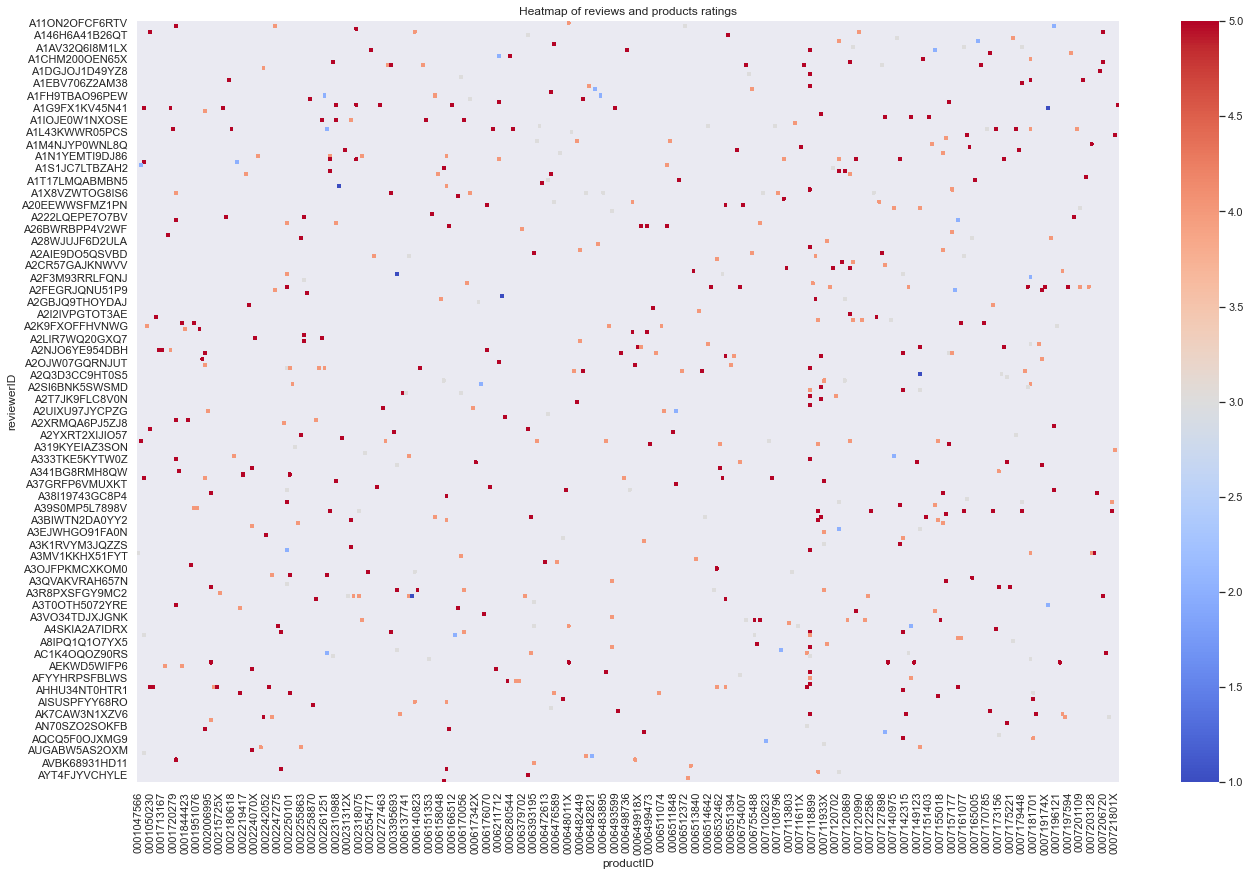

In [170]:
# Plot a heatmap of reviews and products ratings

plt.figure(figsize=(22, 14))
colormap = plt.cm.coolwarm
sns.heatmap(data.iloc[:600,].pivot(index = 'reviewerID',
                                columns = 'productID',
                                values = 'ratingScore'),
            cmap = colormap)
plt.title('Heatmap of reviews and products ratings')
plt.show()

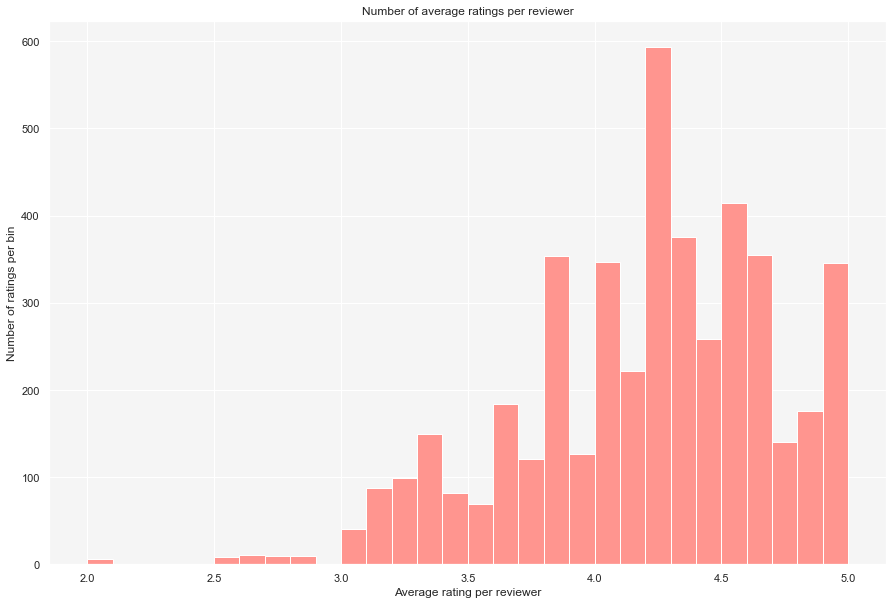

In [171]:
# Distribution of the average rating per reviewer

fig = plt.figure(figsize=(15, 10))
plt.hist(data['mean_rating_reviewer'],bins=30, color='#ff958f')
plt.xlabel('Average rating per reviewer')
plt.ylabel('Number of ratings per bin')
ax = plt.gca()
ax.set_facecolor('#f5f5f5')
ax.set_title('Number of average ratings per reviewer')
plt.show()

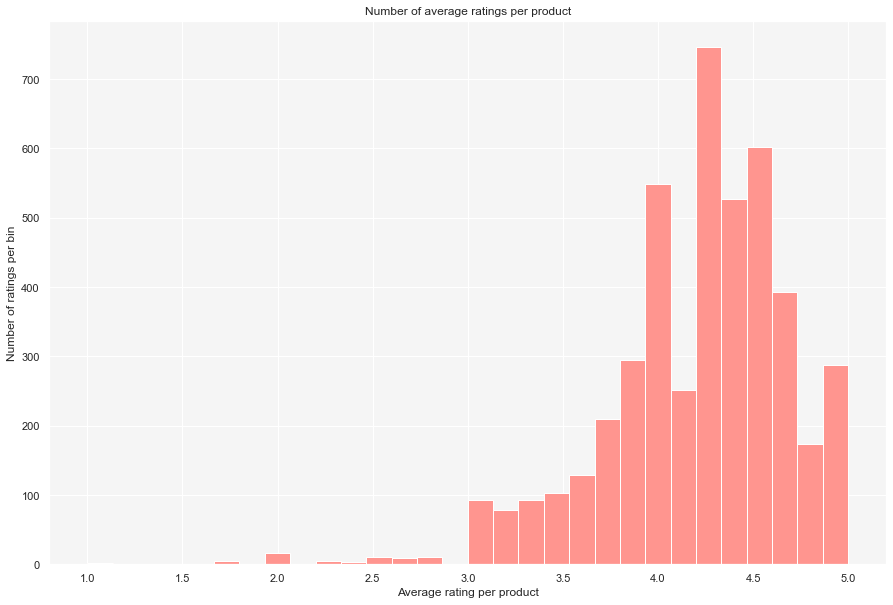

In [172]:
# Distribution of the average rating per product

fig = plt.figure(figsize=(15, 10))
plt.hist(data['mean_rating_product'],bins=30, color='#ff958f')
plt.xlabel('Average rating per product')
plt.ylabel('Number of ratings per bin')
ax = plt.gca()
ax.set_facecolor('#f5f5f5')
ax.set_title('Number of average ratings per product')
plt.show()

In [173]:
meta_data.head(10)

,category,description,title,brand,rank,price,productID
0,"['Books', 'New, Used & Rental Textbooks', 'Bus...",['Simple Truths of Service: Inspired by Jonny ...,The Simple Truths of Service: Inspired by John...,Visit Amazon's Ken Blanchard Page,"2,566,783 in Books (",NaN,0000230022
1,"['Books', 'Literature & Fiction', 'Dramas & Pl...",['William Shakespeare is widely regarded as th...,Love's Labour's Lost: Performed by Derek Jacob...,Visit Amazon's William Shakespeare Page,"11,922,808 in Books (",$20.93,0001050230
2,"['Books', 'Literature & Fiction', 'Contemporary']",[],Microserfs,Visit Amazon's Douglas Coupland Page,"13,244,841 in Books (",NaN,0001052292
3,"['Books', 'Literature & Fiction', 'Short Stori...",[],The Case Book of Sherlock Holmes,"Arthur Conan, Sir Doyle","10,925,240 in Books (",NaN,0001054783
4,"['Books', 'Literature & Fiction', 'Contemporary']","['Jo Clifford, a successful journalist, is all...",Lady of Hay,Visit Amazon's Barbara Erskine Page,"14,105,839 in Books (",NaN,000105001X
5,"['Books', 'Literature & Fiction', 'Classics']","[""Grade 6 Up-Kidnapped by Robert Louis Stevens...",Kidnapped (HarperCollinsAudioBooks),Visit Amazon's Robert Louis Stevenson Page,"13,878,095 in Books (",NaN,0001047868
6,"['Books', 'Literature & Fiction', 'Poetry']",['Kahlil Gibran was among the most important A...,The Prophet,Visit Amazon's Kahlil Gibran Page,"1,810,945 in Books (",NaN,000100039X
7,"['Books', 'New, Used & Rental Textbooks', 'Hum...",['William Shakespeare is widely regarded as th...,Othello: Complete &amp; Unabridged,Visit Amazon's William Shakespeare Page,"18,682,789 in Books (",NaN,0001048767
8,"['Books', 'Literature & Fiction', 'Poetry']",['Grade 7 Up-Scottish actor John Cairney gives...,The Poems &amp; Songs of Robert Burns (HarperC...,Visit Amazon's Robert Burns Page,"11,959,926 in Books (",NaN,0001049143
9,"['Books', 'Literature & Fiction', 'Contemporary']",[],Hand in Glove,Visit Amazon's Robert Goddard Page,"16,076,344 in Books (",NaN,0001047566


In [174]:
# Transform rank feature from string to int

def from_string_to_int(string):
    return int(string.split()[0].replace(',',''))

meta_data['rank'] = meta_data['rank'].apply(from_string_to_int)

print('Ranks range from '+str(min(meta_data['rank']))+
      ' to '+str(max(meta_data['rank'])))

Ranks range from 36170 to 20472904


In [175]:
# Add the rank of products in metada to the data

data = pd.merge(data,meta_data[['productID', 'rank']], on = 'productID')
data.head()

,ratingScore,reviewerID,productID,mean_rating_reviewer,nb_reviews_product,nb_reviews_reviewer,mean_rating_product,rank
0,2.0,AOGE8PM6KED3O,0007133766,3.642857,8,14,4.0,2095763
1,5.0,A1I2O9Y3X3HXLS,0007133766,4.933333,8,15,4.0,2095763
2,4.0,A2CR57GAJKNWVV,0007133766,3.933333,8,15,4.0,2095763
3,4.0,A2FEGRJQNU51P9,0007133766,4.250000,8,20,4.0,2095763
4,3.0,A1X8VZWTOG8IS6,0007133766,3.333333,8,63,4.0,2095763


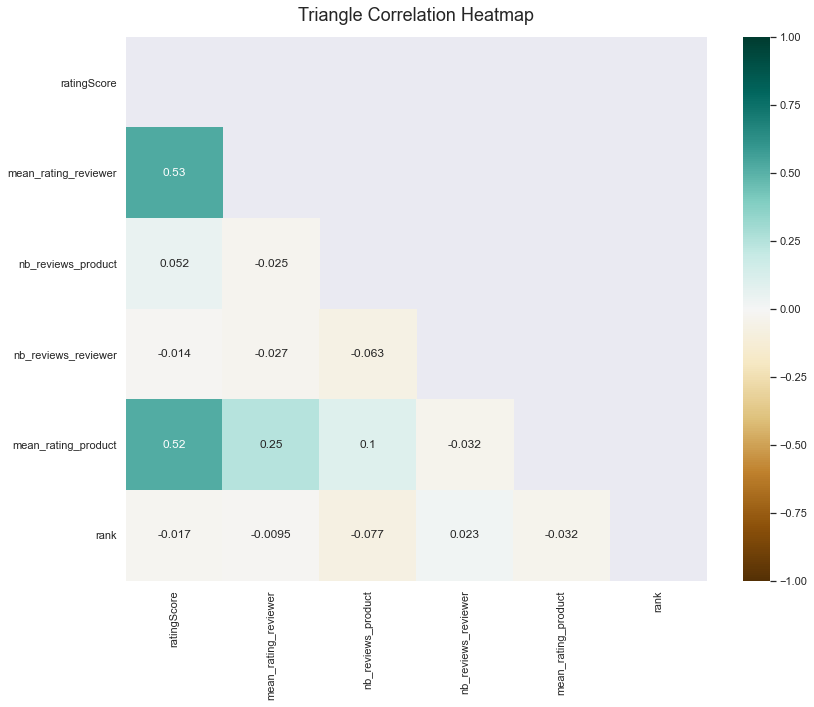

In [176]:
# Plot correlation matrix

corr = data.corr()

plt.figure(figsize=(13, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))
heatmap = sns.heatmap(corr, mask=mask, vmin=-1, vmax=1,
                      annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap',
                  fontdict={'fontsize':18}, pad=16)
plt.show()

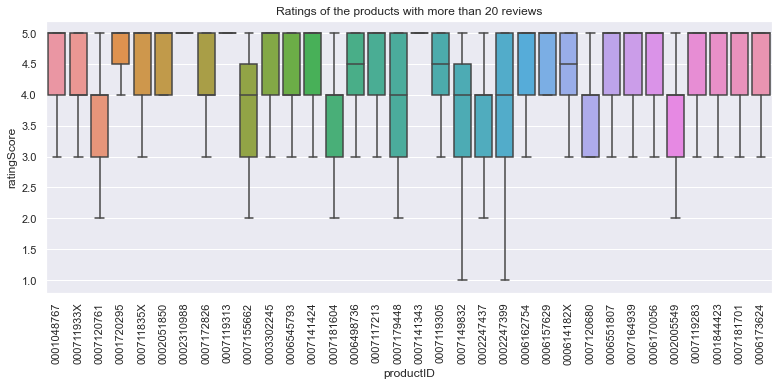

In [177]:
# Plot the variation of the ratings per user

plt.figure(figsize=(13,5))
sns.boxplot(x = data[data['nb_reviews_product']>20]['productID'],
            y = data[data['nb_reviews_product']>20]['ratingScore'],
            fliersize=0)
plt.xticks(rotation='vertical')
plt.title('Ratings of the products with more than 20 reviews')
plt.show()

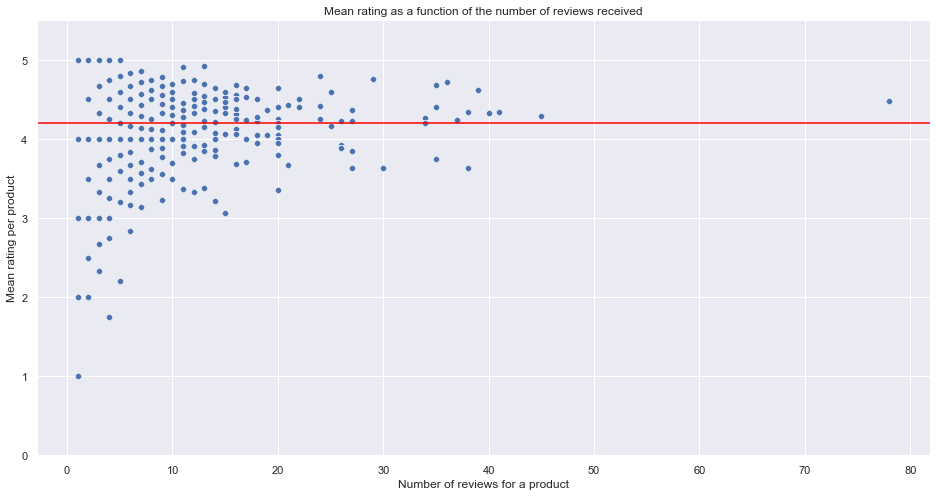

In [178]:
# Average rating per product with respect to its number of reviews

fig, axis1 = plt.subplots(1,1,figsize=(16,8))
plt.ylim(0,5.5)
sns.scatterplot(x="nb_reviews_product", y="mean_rating_product",ax=axis1, data = data)
axis1.axhline(y= data['ratingScore'].mean(), color='red')
plt.xlabel('Number of reviews for a product')
plt.ylabel('Mean rating per product')
plt.title('Mean rating as a function of the number of reviews received')
plt.show()

In [179]:
# Merge the rest of the metadata to the data for further development of the models

data = data.drop('rank', axis = 1)
data_merged = pd.merge(data, meta_data[['productID','category','brand','rank','price']],
                       on='productID')
data_merged['price'] = data_merged['price'].replace('[\$,]', '', regex=True).astype(float)
data_merged['brand'] = data_merged['brand'].replace(['Visit Amazon\'s ','Page'],'', regex=True)
data_merged['category'] = data_merged['category'].replace(['\'Books\', ',']','\[','\'','\"'],'', regex=True)

data_merged.head()

,ratingScore,reviewerID,productID,mean_rating_reviewer,nb_reviews_product,nb_reviews_reviewer,mean_rating_product,category,brand,rank,price
0,2.0,AOGE8PM6KED3O,0007133766,3.642857,8,14,4.0,"Science Fiction & Fantasy, Fantasy",Raymond E Feist,2095763,14.83
1,5.0,A1I2O9Y3X3HXLS,0007133766,4.933333,8,15,4.0,"Science Fiction & Fantasy, Fantasy",Raymond E Feist,2095763,14.83
2,4.0,A2CR57GAJKNWVV,0007133766,3.933333,8,15,4.0,"Science Fiction & Fantasy, Fantasy",Raymond E Feist,2095763,14.83
3,4.0,A2FEGRJQNU51P9,0007133766,4.250000,8,20,4.0,"Science Fiction & Fantasy, Fantasy",Raymond E Feist,2095763,14.83
4,3.0,A1X8VZWTOG8IS6,0007133766,3.333333,8,63,4.0,"Science Fiction & Fantasy, Fantasy",Raymond E Feist,2095763,14.83


In [180]:
# Get all book categories and number of their occurences in a sorted dictionary

categories = data_merged['category'].apply(lambda x: x.split(','))
categories = [item for sublist in categories for item in sublist]
categories = [item.strip() for item in categories]
categories.remove('')

occur = {}
for i,item in enumerate(categories):
    occur[item] = occur.get(item, 0) + 1
occur['None'] = occur.pop('')
occur = sorted(occur.items(), key=lambda x: x[1], reverse=True)
occur = {item[0]: item[1] for item in occur}

In [234]:
plt.rcParams.update({'font.size': 22})

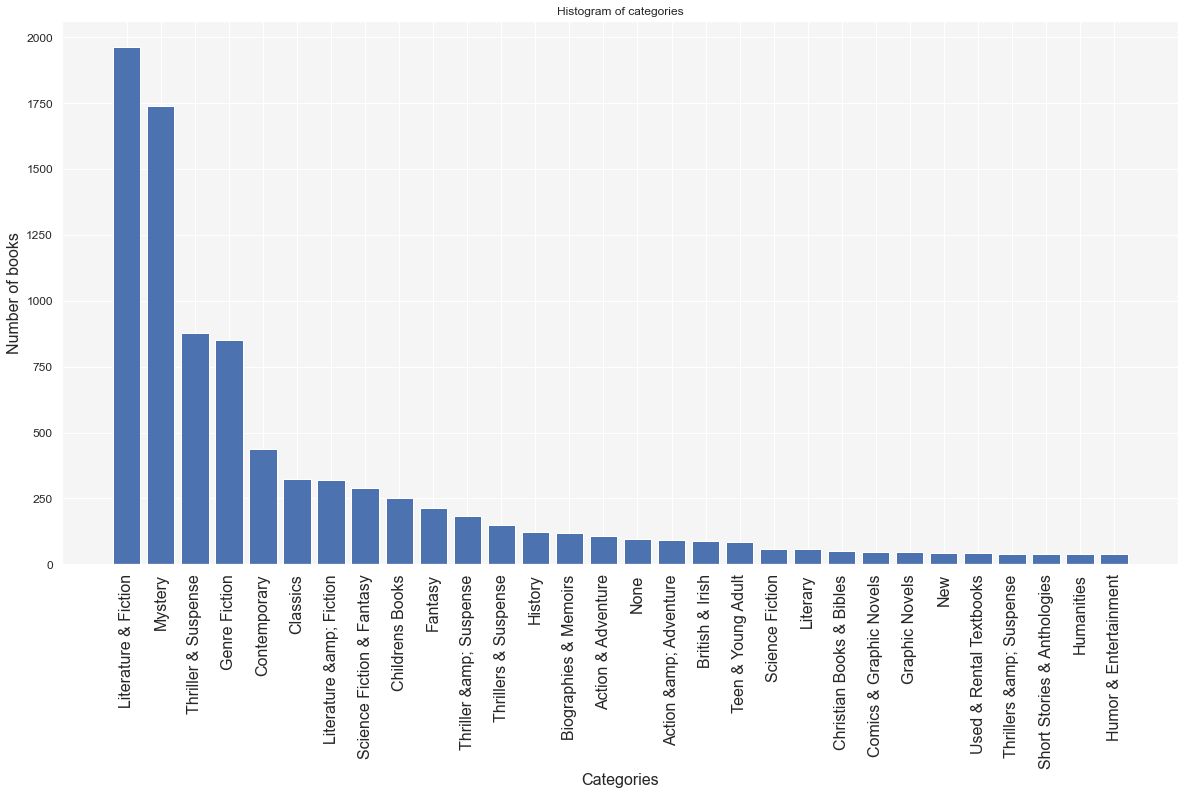

In [246]:
# Plot a histogram of the 30 first categories

plt.rc('figure', titlesize=22)
plt.rc('axes', labelsize=16)  
plt.rc('axes', labelsize=16)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=12)

categories_1 = list(occur.keys())[:30]
occurences_1 = list(occur.values())[:30]

fig, ax = plt.subplots(figsize=(20,10))
ax.bar(categories_1,occurences_1)
plt.xticks(rotation=90)
plt.xlabel('Categories')
plt.ylabel('Number of books')
ax.set_facecolor('#f5f5f5')
ax.set_title('Histogram of categories')
plt.show()

## First model : SVD

In [135]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [ ]:
ratings_matrix = data.pivot_table(values='ratingScore', index='productID', columns='reviewerID', fill_value=0)
ratings_array = ratings_matrix.values

In [ ]:
imp_mean = IterativeImputer(missing_values=0, random_state=0, min_value=1, max_value=5)
ratings_array_predicted = imp_mean.fit_transform(ratings_array)

/usr/local/lib/python3.6/dist-packages/sklearn/impute/_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


In [ ]:
ratings_array_predicted

array([[3.72395741, 2.82431693, 5.        , ..., 5.        , 3.95386531,
        4.76406402],
       [4.24249186, 4.56244511, 5.        , ..., 4.21769427, 3.73875888,
        3.69711425],
       [3.74499929, 3.03853688, 5.        , ..., 4.84590387, 4.26982667,
        4.5715409 ],
       ...,
       [3.80850885, 4.12495524, 5.        , ..., 5.        , 4.29026896,
        4.51639362],
       [2.85182003, 2.82206642, 4.48497248, ..., 4.63452698, 2.2117206 ,
        4.68500904],
       [3.74189994, 2.75026137, 5.        , ..., 5.        , 3.87089441,
        4.79815968]])

## Second model : hybrid methodd

# Testing the submission locally

Once you have come up with a good model, we advise to test it locally. Do to so, the package ramp_workflow needs to be installed. The package is in the list of requirements.txt and can be installed by the following command if it is not already installed.

```
python -m pip install https://api.github.com/repos/paris-saclay-cds/ramp-workflow/zipball/master
```

Your code should be written in a python file that you name estimator.py. It has to countain a function name get_estimator that returns an object of type scikit-learn like that solves the problem. <br>
This file should be found in a folder called anyway you want, itself found in the **submission/** folder.
As a example, you can find the SVD model of this notbook in the path submission\SVD\estimator.py. <br>
<br>

Your code can be tested on the data set with the folowing command :
```
ramp-test --submission <your submission folder name>
```
A Ramp-workflow option is also implemented in the problem that allow you to run your code on a smaller set of the data. This allow you to test quicker your code on a subset. The command to run your code with the quick-mode is the following : 
```
ramp-test --submission <your submission folder name> --quick-test
```

For example, to run the SVD model on quick mode, you can run the following line :






In [ ]:
! ramp-test --submission SVD --quick-test

# More information
For more information on how to submit your code on [ramp.studio](https://ramp.studio/), refer to the [online documentation](https://paris-saclay-cds.github.io/ramp-docs/ramp-workflow/stable/using_kits.html).
You can also read the READ.ME file